### Brian Ramirez - Random Forests Project

**Research Question**

_Can Random Forests predict a patient's total charge and identify the most relevant features for this prediction?_ This analysis aims to enable the organization to prioritize revenue-generating services.

**Project Goals**

- Predict patient total charges using Random Forests.
- Determine key features impacting patient charges.
- Offer actionable recommendations to stakeholders.

**Methodology**

Random Forests is an ensemble learning method which was chosen for its robust regression and classification capabilities.
The process includes several steps, which "Practical Statistics for Data Scientists" describes as the following: 

1. Sampling a subset of data.
2. Randomizing variable selection for splits.
3. Applying the algorithm to each subset.
4. Choosing splits that optimize class homogeneity.
5. Developing the tree to completion.
6. Repeating the process.

(Bruce, Bruce, & Gedeck, 2020)

This method's approach to regression is well-suited for forecasting patient charges and identifying influential features.

**Assumption**

A key assumption for Random Forests is that the sample data is representative of the population. This technique inherently accounts for this by using subsampling as an integral step in the algorithm, ensuring a comprehensive model.

**Packages and Libraries**

Key Python packages for this project include:

- `Pandas`: For data manipulation and analysis.
- `NumPy`: For numerical computations.
- `Scikit-Learn`:
  - `Preprocessing`: To convert categorical data into numerical.
  - `Model Selection (train_test_split)`: To partition the dataset into training and testing sets.
  - `Ensemble (RandomForestRegressor)`: To implement the Random Forest model.
  - `Metrics`: To evaluate model accuracy.
- `Matplotlib (PyPlot)`: For data visualization.
- `Warnings (filterwarnings)`: To suppress unnecessary warnings during analysis.

The integration of these tools will facilitate the development of a predictive model for patient charges, providing insights for informed decision-making.


## Data Preparation

### Preprocessing Objective

Our preprocessing objective aligns with employing Random Forests as our prediction method. We aim to transform all categorical variables into numerical values, an essential step because the `RandomForestRegressor` cannot process categorical data. This conversion ensures the model operates effectively.

### Essential Variables

The dataset includes the following variables, categorized by type and detailed with descriptions:

| Type | Variable | Description |
| :--- | :--- | :--- |
| Target (Continuous) | `Total_charge` | The patient's total charge for their hospital stay. |
| Continuous | `Age` | The age of the patient. |
| Continuous | `Doc_visits` | The count of doctor visits during the patient's stay. |
| Continuous | `Initial_days` | The duration of the patient's initial hospital stay. |
| Continuous | `Additional_charges` | Extra charges incurred during the patient's stay. |
| Categorical | `Complication_risk` | The assigned risk level of complications for the patient. |
| Categorical | `HighBlood` | Indicates if the patient is diagnosed with high blood pressure. |
| Categorical | `Stroke` | Indicates if the patient has had a stroke. |
| Categorical | `Overweight` | Indicates if the patient is diagnosed as overweight or obese. |
| Categorical | `Arthritis` | Indicates if the patient has arthritis. |
| Categorical | `Diabetes` | Indicates if the patient has diabetes. |
| Categorical | `Hyperlipidemia` | Indicates if the patient has hyperlipidemia. |
| Categorical | `Backpain` | Indicates if the patient suffers from back pain. |
| Categorical | `Anxiety` | Indicates if the patient has anxiety. |
| Categorical | `Allergic_rhinitis` | Indicates if the patient has allergic rhinitis. |
| Categorical | `Reflux_esophagitis` | Indicates if the patient has reflux esophagitis. |

This information will guide the data preprocessing phase to prepare our dataset for the Random Forests model.


### Data Preparation Steps

**Step Zero: Data Import and Initialization**

- Import the CSV file into Jupyter Notebook and create a DataFrame.
- Create a subset of the DataFrame containing the necessary variables.
- Create a deep copy of the DataFrame for safe data manipulation.

**Step Zero - Required Imports**

The following Python libraries are required for Step Zero:

- `Pandas`: Utilized for loading the CSV file, creating a DataFrame, and saving a deep copy of the data.
- `NumPy`: Essential for creating a subset of the DataFrame.
- `filterwarnings` from the `warnings` library: Employed to suppress redundant error messages during data preparation.


In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Use Pandas to load the CSV file into Jupyter Notebook and make a DataFrame

df=pd.read_csv('/medical_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Use NumPy to create a subset of the dataframe with the relevant variables

df = df.iloc[:, np.r_[15, 21, 26:37, 39:42]]

In [4]:
# Display the subset data frame's info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Doc_visits          10000 non-null  int64  
 2   HighBlood           10000 non-null  object 
 3   Stroke              10000 non-null  object 
 4   Complication_risk   10000 non-null  object 
 5   Overweight          10000 non-null  object 
 6   Arthritis           10000 non-null  object 
 7   Diabetes            10000 non-null  object 
 8   Hyperlipidemia      10000 non-null  object 
 9   BackPain            10000 non-null  object 
 10  Anxiety             10000 non-null  object 
 11  Allergic_rhinitis   10000 non-null  object 
 12  Reflux_esophagitis  10000 non-null  object 
 13  Initial_days        10000 non-null  float64
 14  TotalCharge         10000 non-null  float64
 15  Additional_charges  10000 non-null  float64
dtypes: fl

In [5]:
# Display the first five rows of the subset dataframe

df.head()

,Age,Doc_visits,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Initial_days,TotalCharge,Additional_charges
0,53,6,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,10.585770,3726.702860,17939.403420
1,51,4,Yes,No,High,Yes,No,No,No,No,No,No,Yes,15.129562,4193.190458,17612.998120
2,53,4,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,4.772177,2434.234222,17505.192460
3,78,4,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,1.714879,2127.830423,12993.437350
4,22,5,No,No,Low,No,No,No,Yes,No,No,Yes,No,1.254807,2113.073274,3716.525786


In [6]:
# Make a deep copy of the file

patient_df_deep_copy=df.copy(deep=True)

**Step One: Data Cleaning**

- Check for duplicate values and handle them as necessary.
- Identify and manage missing or null values.
- Evaluate variable correlations.


In [7]:
# Check duplicate data value count

df.duplicated().value_counts()

False    10000
dtype: int64

<p>No duplicate values detected.<br>
Treatment of duplicate values will not be necessary.</p>

In [8]:
# Check missing or null value count

df.isnull().sum()

Age                   0
Doc_visits            0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<p>No missing or null values detected.<br>
Treatment of missing or null values will not be necessary.</p>

In [9]:
# Check correlation

df_cont_vars = df[df.columns[df.dtypes == 'float64']]
df_cont_vars.corr(method='pearson')

,Initial_days,TotalCharge,Additional_charges
Initial_days,1.000000,0.987640,0.004409
TotalCharge,0.987640,1.000000,0.029256
Additional_charges,0.004409,0.029256,1.000000


**Step Two: Feature Engineering**

- Rename continuous variables to snake case for uniformity.
- Convert categorical variables into dummy variables with numerical values.
- Remove original categorical variables to retain only re-expressed values.

In [10]:
# Rename continuous variables to snake case

df.rename(columns=({'Age':'age', 'Doc_visits':'doc_visits', 'Initial_days':'initial_days', 'TotalCharge':'total_charge', 'Additional_charges':'additional_charges'}),inplace=True)

In [12]:
# Reexpress categorical variables into dummy variables with numerical values

le=LabelEncoder()

overweight=le.fit_transform(df.Overweight)
arthritis=le.fit_transform(df.Arthritis)
diabetes=le.fit_transform(df.Diabetes)
hyperlipidemia=le.fit_transform(df.Hyperlipidemia)
backpain=le.fit_transform(df.BackPain)
anxiety=le.fit_transform(df.Anxiety)
rhinitis=le.fit_transform(df.Allergic_rhinitis)
esophagitis=le.fit_transform(df.Reflux_esophagitis)
blood_pressure=le.fit_transform(df.HighBlood)
stroke=le.fit_transform(df.Stroke)

#df['services']=pd.get_dummies(df["Services"])
df['comp_risk'] = [1 if v == 'Low' else 2 if v == 'Medium' else 3 for v in df['Complication_risk']]
df['blood_pressure']=blood_pressure
df['stroke']=stroke
df['overweight']=overweight
df['arthritis']=arthritis
df['diabetes']=diabetes
df['hyperlipidemia']=hyperlipidemia
df['backpain']=backpain
df['anxiety']=anxiety
df['rhinitis']=rhinitis
df['esophagitis']=esophagitis
df['blood_pressure']=blood_pressure
df['stroke']=stroke


In [13]:
# DataFrame including old variables and dummy variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   doc_visits          10000 non-null  int64  
 2   HighBlood           10000 non-null  object 
 3   Stroke              10000 non-null  object 
 4   Complication_risk   10000 non-null  object 
 5   Overweight          10000 non-null  object 
 6   Arthritis           10000 non-null  object 
 7   Diabetes            10000 non-null  object 
 8   Hyperlipidemia      10000 non-null  object 
 9   BackPain            10000 non-null  object 
 10  Anxiety             10000 non-null  object 
 11  Allergic_rhinitis   10000 non-null  object 
 12  Reflux_esophagitis  10000 non-null  object 
 13  initial_days        10000 non-null  float64
 14  total_charge        10000 non-null  float64
 15  additional_charges  10000 non-null  float64
 16  comp_

In [14]:
# Drop the original categorical variables and the unnecessary index column

df.drop(columns=['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis'], inplace=True)
df = df.reset_index(drop=True)
df.head()


,age,doc_visits,initial_days,total_charge,additional_charges,comp_risk,blood_pressure,stroke,overweight,arthritis,diabetes,hyperlipidemia,backpain,anxiety,rhinitis,esophagitis
0,53,6,10.585770,3726.702860,17939.403420,2,1,0,0,1,1,0,1,1,1,0
1,51,4,15.129562,4193.190458,17612.998120,3,1,0,1,0,0,0,0,0,0,1
2,53,4,4.772177,2434.234222,17505.192460,2,1,0,1,0,1,0,0,0,0,0
3,78,4,1.714879,2127.830423,12993.437350,2,0,1,0,1,0,0,0,0,0,1
4,22,5,1.254807,2113.073274,3716.525786,1,0,0,0,0,0,1,0,0,1,0


In [15]:
# Description of new DataFrame

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.00000,89.00000
doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.00000,9.00000
initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.16102,71.98149
total_charge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.69975,9180.72800
additional_charges,10000.0,12934.528587,6542.601544,3125.703000,7986.487755,11573.977735,15626.49000,30566.07000
comp_risk,10000.0,2.123300,0.730172,1.000000,2.000000,2.000000,3.00000,3.00000
blood_pressure,10000.0,0.409000,0.491674,0.000000,0.000000,0.000000,1.00000,1.00000
stroke,10000.0,0.199300,0.399494,0.000000,0.000000,0.000000,0.00000,1.00000
overweight,10000.0,0.709400,0.454062,0.000000,0.000000,1.000000,1.00000,1.00000
arthritis,10000.0,0.357400,0.479258,0.000000,0.000000,0.000000,1.00000,1.00000


**Step Three: Data Visualization**

- Create a histogram to visualize the cleaned dataset.

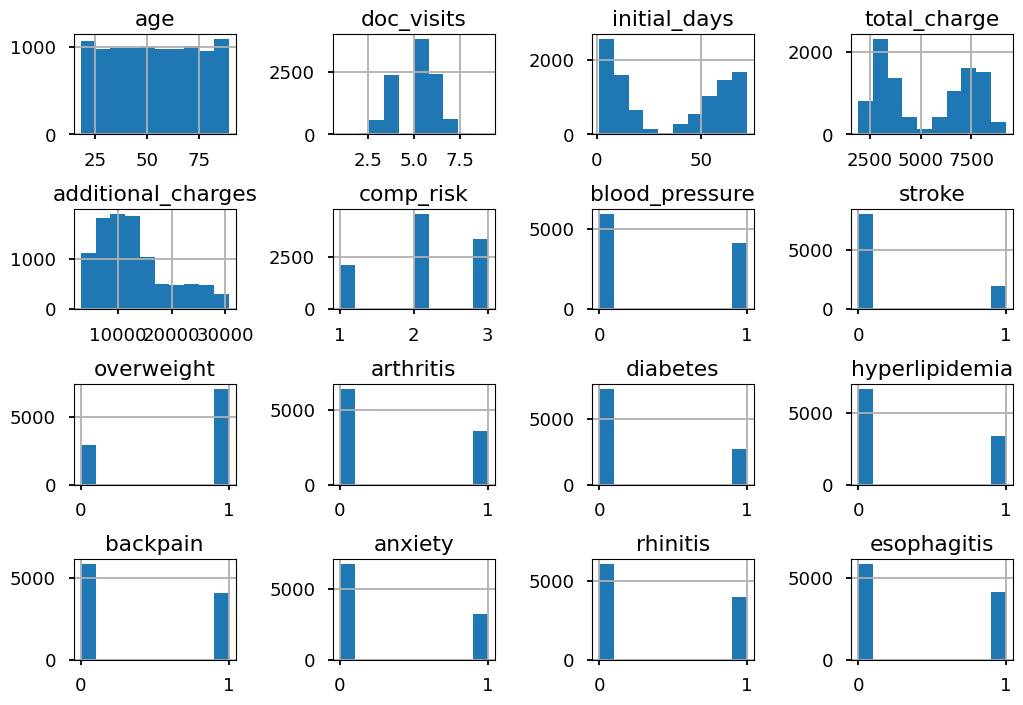

In [16]:
# Create a graph of the cleaned data set

plt.style.use('seaborn-talk')
df.hist()
plt.tight_layout()
plt.show()

### Copy of the Cleaned Data Set

In [17]:
# Provide a copy of the cleaned data set

df.to_csv('clean_data.csv')

## Model Development

In [18]:
# Move the target variable to the end of the dataframe

df_reorg=[col for col in df.columns if col != 'total_charge'] + ['total_charge']
df=df[df_reorg]

In [19]:
# Split the data into train and test data sets

X=df.drop(['total_charge'], axis=1)
y=df.total_charge
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20, random_state=21)
print("The Feature Dimension is: ", X.shape) 

The Feature Dimension is:  (10000, 15)


In [20]:
# Create train data sets and save to CSV

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

In [21]:
# Create test data sets and save to CSV

X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

### Step One: Model Initialization

- Create a `RandomForestRegressor` variable.

In [22]:
# Create a RandomForestRegressor variable

randomForestModel = RandomForestRegressor(n_estimators=200, bootstrap=True, max_features='sqrt')

### Step Two: Model Training and Evaluation

- Fit the model with training and test datasets.
- Make predictions and assess accuracy using metrics.

In [23]:
# Fit the model

randomForestModel.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [28]:
# Make predictions and check accuracy

rf_preds = randomForestModel.predict(X_test)
print('    Mean Absolute Error:', mean_absolute_error(y_test, rf_preds))
print('     Mean Squared Error:', mean_squared_error(y_test, rf_preds))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_preds)))
print('                  Score: %.3f' % randomForestModel.score(X_test, y_test))

    Mean Absolute Error: 298.61267919315236
     Mean Squared Error: 132144.78766622327
Root Mean Squared Error: 363.51724534913507
                  Score: 0.973


### Step Three: Feature Importance

- Generate feature importance scores.
- Assess the most significant features.

In [29]:
# Create features and importances

features = X_train.columns

importances = list(randomForestModel.feature_importances_)

In [30]:
# Check feature importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:20} Importance {}'.format(*pair)) for pair in feature_importances];

Variable: initial_days         Importance 0.88
Variable: additional_charges   Importance 0.03
Variable: age                  Importance 0.02
Variable: doc_visits           Importance 0.01
Variable: comp_risk            Importance 0.01
Variable: blood_pressure       Importance 0.0
Variable: stroke               Importance 0.0
Variable: overweight           Importance 0.0
Variable: arthritis            Importance 0.0
Variable: diabetes             Importance 0.0
Variable: hyperlipidemia       Importance 0.0
Variable: backpain             Importance 0.0
Variable: anxiety              Importance 0.0
Variable: rhinitis             Importance 0.0
Variable: esophagitis          Importance 0.0


### Step Four: Model Refinement

- Rebuild the model with the most important features.
- Train the refined model.
- Make predictions with the refined model.

In [31]:
# Recreate model with important features

rf_important = RandomForestRegressor(n_estimators=500, random_state=5)
important_indices = [features[2], features[1]]

train_important = X_train.loc[:,['initial_days', 'age', 'additional_charges']]
test_important = X_test.loc[:,['initial_days', 'age', 'additional_charges']]



In [32]:
# Fit the model

rf_important.fit(train_important, y_train)

RandomForestRegressor(n_estimators=500, random_state=5)

In [33]:
# Make the predictions

preds = rf_important.predict(test_important)
preds

array([2754.66279009, 2739.73113996, 6628.737908  , ..., 3839.38261974,
       6781.525688  , 8050.152992  ])

## Data Summary and Implications

### Model Evaluation

- The initial model achieved a 97.5% accuracy, while the refined model with only essential features reached 98.0%. This indicates improved predictive power in the refined model.
- The target variable, patient's total charge, is measured in dollars, making MSE and RMSE crucial for assessing prediction accuracy. The refined model demonstrates superior accuracy in both metrics.
- The Mean Squared Error (MSE) highlights the difference between predicted and actual values in the dataset.
- The Root Mean Squared Error (RMSE) is the square root of the MSE, indicating higher accuracy with lower scores.

In [35]:
print('         Original Model Mean Squared Error:', mean_squared_error(y_test, rf_preds))
print('Important Feature Model Mean Squared Error:', mean_squared_error(y_test, preds))

         Original Model Mean Squared Error: 132144.78766622327
Important Feature Model Mean Squared Error: 97209.21397599732


In [36]:
print('         Original Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_preds)))
print('Important Feature Model Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

         Original Model Root Mean Squared Error: 363.51724534913507
Important Feature Model Root Mean Squared Error: 311.78392193311913


### Results and Implications

- The Random Forests method, initially achieving 97.5% accuracy, improved to 98.0% in the refined model.
- The most critical feature for predicting a patient's total charge is "Initial_days," representing the duration of their initial hospital stay.

- The organization should leverage these results to explore revenue generation during patients' initial stays and allocate resources accordingly.

- Further enhancement can be achieved through hyperparameter tuning.

## Limitations

- While Random Forests are powerful for machine learning and predictions, scalability can be a limitation. For large datasets, the method may become slow and less effective for real-time predictions.

## Recommended Course of Action

- Utilize the predictive model to identify revenue-generating services during a patient's initial stay.
- Consider hyperparameter tuning to further improve model performance.
- Exercise caution when scaling the amount of data analyzed, as Random Forests can become slow and less effective with large datasets.

## References

- Bruce, P., Bruce, A., & Gedeck, P. (2020). _Practical statistics for data scientists: 50+ essential concepts using R and Python_. O'Reilly Media, Incorporated.

- Donges, Niklas (n.d.). _Random Forest: A Complete Guide for Machine Learning_. [BuiltIn.com](https://builtin.com/data-science/random-forest-algorithm).

- Kayitar, Prakhar (n.d.). _Assumptions in Supervised Machine Learning Models_. [CloudyML.com](www.cloudyml.com/blog/assumptions-in-machine-learning-models/).